<a href="https://colab.research.google.com/github/Nomaqui/Entrega_1_analisis_de_datos/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EDA aplicado a dataset de transformadores de distribución en el departamento del Cauca.**

INTRODUCCIÓN:
El análisis exploratorio de datos (EDA) constituye una de las fases más importantes en proyectos de analítica, ya que permite comprender la estructura de la información, identificar patrones relevantes, detectar valores atípicos y garantizar la calidad de los datos antes de aplicar modelos más complejos.

En este caso, se dispone de un dataset correspondiente al año 2019 que recopila variables técnicas y operativas relacionadas con el desempeño de transformadores en redes de distribución eléctrica. Dentro de la información se incluyen parámetros como la densidad de descargas atmosféricas, la longitud de las líneas de red (km), la potencia nominal de los transformadores, el tipo de red (aérea o subterránea), el tipo de protección, el número de usuarios atendidos, así como indicadores de confiabilidad tales como el Burning rate (fallas por año) y el número de transformadores quemados.

El objetivo principal del EDA es realizar una exploración sistemática de estos datos con el fin de:

Describir y caracterizar las variables presentes en el dataset.

Identificar tendencias y relaciones entre factores como la longitud de red, la densidad de descargas atmosféricas y el número de usuarios con respecto a las fallas reportadas.

Detectar valores atípicos o inconsistentes que puedan influir en el análisis de confiabilidad del sistema eléctrico.

Generar visualizaciones que faciliten la interpretación de la información y la toma de decisiones orientadas a la mejora de la operación y mantenimiento de la infraestructura




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('Dataset_Year_2019.csv')
df

,LOCATION,POWER,SELF-PROTECTION,Average earth discharge density DDT [Rays/km^2-año],Maximum ground discharge density DDT [Rays/km^2-año],Burning rate [Failures/year],Criticality according to previous study for ceramics level,Removable connectors,Type of clients,Number of users,Electric power not supplied EENS [kWh],Type of installation,Air network,Circuit Queue,km of network LT:,Burned transformers 2019
0,1,112.5,0,3.155602,6.6,0.00,0,1,STRATUM 2,94,1822.5,MACRO WITHOUT ANTI-FRAUD NET,1,0,0.32362,0
1,1,10.0,0,3.155602,6.6,0.00,0,1,OFFICIAL,1,270.0,MACRO WITHOUT ANTI-FRAUD NET,1,0,0.30036,0
2,1,25.0,0,3.155602,6.6,0.00,0,1,STRATUM 2,74,405.0,MACRO WITHOUT ANTI-FRAUD NET,1,0,0.29695,0
3,1,75.0,0,3.155602,6.6,0.00,0,1,STRATUM 6,30,1215.0,MACRO WITHOUT ANTI-FRAUD NET,1,0,0.12575,0
4,1,75.0,0,3.155602,6.6,0.00,0,1,STRATUM 4,24,1215.0,MACRO WITHOUT ANTI-FRAUD NET,1,1,0.16605,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15868,0,37.5,0,3.155602,6.6,0.00,0,0,STRATUM 1,30,796.5,POLE,1,0,0.80303,0
15869,0,37.5,0,4.148532,8.3,0.25,0,1,STRATUM 1,57,607.5,POLE,1,0,"146,419",0
15870,0,25.0,0,3.850980,6.1,0.00,0,0,STRATUM 1,21,855.0,POLE,1,1,0.7399,0
15871,0,10.0,0,0.717021,2.5,0.00,1,1,STRATUM 1,10,162.0,POLE,1,0,"176,708",0


DESCRIPCIÓN DE VARIABLES

LOCATION:
Variable categórica (0/1) que identifica si el transformador se encuentra en una ubicación
específica o pertenece a cierta categoría de localización.

POWER:
Potencia aparente de cada transformador, expresada en kVA. Es una medida de la capacidad
de transformación de energía eléctrica.

SELF-PROTECTION:
Variable binaria que indica si el transformador es autoprotegido (1) o convencional (0).

Average earth discharge density DDT [Rays/km^2-año]:
Promedio anual de densidad de descargas atmosféricas (rayos) por kilómetro cuadrado en
la zona donde se encuentra el transformador.

Maximum ground discharge density DDT [Rays/km^2-año]:
Valor máximo anual de densidad de descargas atmosféricas en la zona. Sirve como indicador
de riesgo para equipos expuestos.

Burning rate [Failures/year]:
Tasa de fallas de transformadores por año. Representa la frecuencia de eventos de quema.

Criticality according to previous study for ceramics level:
Nivel de criticidad del transformador de acuerdo con un estudio previo sobre el impacto de
la falla en elementos de cerámica de la red.

Removable connectors:
Cantidad de conectores removibles asociados al transformador. Puede afectar la facilidad de
mantenimiento y el riesgo de fallas.

Type of clients:
Categoría que indica el tipo de usuarios atendidos por el transformador (residencial,
industrial, comercial).

Number of users:
Número de usuarios conectados al transformador. A mayor número de usuarios, mayor
impacto potencial en caso de falla.

Electric power not supplied EENS [kWh]:
Energía no suministrada debido a eventos de falla, medida en kWh. Refleja el impacto en
continuidad del servicio.

Type of installation:
Identifica si el transformador está en instalación aérea, subterránea u otro tipo.

Air network:
Variable que indica si el transformador está conectado a una red aérea (1) o no (0).

Circuit Queue:
Posición del transformador en la cola del circuito, útil para priorizar mantenimiento
o reposición.

km of network LT:
Longitud total de la red de baja tensión asociada al transformador, medida en kilómetros.

Burned transformers 2019:
Número de transformadores que se quemaron en el año 2019 en esa ubicación o categoría



In [ ]:
#Tratamiento de datos.
#Analisis exploratorio

# Intentar convertir todas las columnas posibles a numéricas
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col].str.replace(",", "."), errors='ignore')
    except AttributeError:
        # Si no es string, ignora
        pass
# Valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

# Resumen estadístico (ahora sí debe funcionar)
print("\nDescripción estadística de variables numéricas:")
print(df.describe())

# Método IQR para detectar outliers
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

outliers = ((df.select_dtypes(include='number') < (Q1 - 1.5 * IQR)) |
            (df.select_dtypes(include='number') > (Q3 + 1.5 * IQR)))

print("\nNúmero de outliers por columna:")
print(outliers.sum())


Valores nulos por columna:
LOCATION                                                      0
POWER                                                         0
SELF-PROTECTION                                               0
Average earth discharge density DDT [Rays/km^2-año]           0
Maximum ground discharge density DDT [Rays/km^2-año]          0
Burning rate  [Failures/year]                                 0
Criticality according to previous study for ceramics level    0
Removable connectors                                          0
Type of clients                                               0
Number of users                                               0
Electric power not supplied EENS [kWh]                        0
Type of installation                                          0
Air network                                                   0
Circuit Queue                                                 0
km of network LT:                                             0
Burned transf

/tmp/ipython-input-2656807562.py:7: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col].str.replace(",", "."), errors='ignore')


En esta sección se hace el respectivo análisis exploratorio de los datos para identificar si se tienen datos atípicos o datos nulos que deben ser reemplazados para su posterior análisis y para posterior tratamiento de datos.

In [ ]:
#Tratamiento de datos atípicos

# Seleccionar columnas numéricas y detectar binarias
numeric_cols = df.select_dtypes(include='number').columns
binary_cols = [col for col in numeric_cols if df[col].nunique() <= 2]
non_binary_cols = [col for col in numeric_cols if df[col].nunique() > 2]

# Calcular IQR inicial
Q1 = df[non_binary_cols].quantile(0.25)
Q3 = df[non_binary_cols].quantile(0.75)
IQR = Q3 - Q1

# Detectar outliers iniciales
outliers = ((df[non_binary_cols] < (Q1 - 1.5 * IQR)) | (df[non_binary_cols] > (Q3 + 1.5 * IQR)))
cols_con_outliers = outliers.sum()[outliers.sum() > 0].index  # columnas con outliers

# Reemplazar outliers con mediana SOLO en columnas con outliers
df_clean = df.copy()
for col in cols_con_outliers:
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    median_value = df[col].median()
    df_clean[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound),
                             median_value,
                             df[col])

# Recalcular outliers después del reemplazo
Q1_clean = df_clean[non_binary_cols].quantile(0.25)
Q3_clean = df_clean[non_binary_cols].quantile(0.75)
IQR_clean = Q3_clean - Q1_clean
outliers_after = ((df_clean[non_binary_cols] < (Q1_clean - 1.5 * IQR_clean)) |
                  (df_clean[non_binary_cols] > (Q3_clean + 1.5 * IQR_clean)))

cols_con_outliers_after = outliers_after.sum()[outliers_after.sum() > 0].index

# Crear listas finales
ignored_due_to_binary = binary_cols
ignored_due_to_outliers = list(cols_con_outliers_after)
final_analyzed_cols = [col for col in non_binary_cols if col not in ignored_due_to_outliers]

# Imprimir resultados
print("\n Columnas ignoradas por ser binarias:")
print(ignored_due_to_binary)

print("\n Columnas ignoradas porque siguieron con outliers ≠ 0 después del reemplazo:")
print(ignored_due_to_outliers)

print("\n Columnas finales analizadas (limpias):")
print(final_analyzed_cols)



 Columnas ignoradas por ser binarias:
['LOCATION', 'SELF-PROTECTION', 'Criticality according to previous study for ceramics level', 'Removable connectors', 'Air network', 'Circuit Queue', 'Burned transformers 2019']

 Columnas ignoradas porque siguieron con outliers ≠ 0 después del reemplazo:
['POWER', 'Number of users', 'Electric power not supplied EENS [kWh] ']

 Columnas finales analizadas (limpias):
['Average earth discharge density DDT [Rays/km^2-año]', 'Maximum ground discharge density DDT [Rays/km^2-año]', 'Burning rate  [Failures/year]']


En esta sección se realiza el reemplazo de valores atípicos por la media, para que todas las filas tengan valores válidos y no se observen "Huecos" en las gráficas o saltos muy abruptos causados por errores en la digitación de los datos.

En el análisis de datos, se decidió ignorar cuatro columnas que continuaban presentando outliers incluso después del reemplazo por la mediana.

POWER: se excluyó debido a que representa la potencia nominal de referencia del transformador, un valor característico de diseño que puede variar ampliamente entre equipos, por lo que no es adecuado normalizarlo.

Number of users: se descartó porque la cantidad de usuarios conectados a cada transformador puede variar drásticamente entre zonas rurales y urbanas, generando sesgos en el análisis.

Electric power not supplied EENS [kWh]: se ignoró debido a que presenta valores con gran variabilidad y alto nivel de precisión decimal, lo que puede distorsionar la detección de patrones.

km of network LT: se omitió por el mismo motivo, ya que su alta precisión decimal y la amplitud de su rango de valores afectan la consistencia del análisis.

Con esta depuración, se prioriza el uso de variables más representativas y homogéneas para el modelo de análisis.

In [ ]:
#Estadística descriptiva.
# --- Seleccionar solo columnas numéricas NO binarias ---
numeric_cols_no_bin = [col for col in df.select_dtypes(include='number').columns if df[col].nunique() > 2]

# --- Estadística descriptiva avanzada ---
stats = {}

for col in numeric_cols_no_bin:
    stats[col] = {
        "count": df[col].count(),
        "unique_values": df[col].nunique(),
        "mean": df[col].mean(),
        "median": df[col].median(),
        "mode": df[col].mode().iloc[0] if not df[col].mode().empty else np.nan,
        "std": df[col].std(),
        "min": df[col].min(),
        "Q1": df[col].quantile(0.25),
        "Q3": df[col].quantile(0.75),
        "max": df[col].max(),
        "range": df[col].max() - df[col].min(),
        "IQR": df[col].quantile(0.75) - df[col].quantile(0.25),
        "sum": df[col].sum(),
        "skew": df[col].skew(),
        "kurtosis": df[col].kurt()
    }

# Convertir a DataFrame para visualización
df_stats_no_bin = pd.DataFrame(stats).T
df_stats_no_bin

,count,unique_values,mean,median,mode,std,min,Q1,Q3,max,range,IQR,sum,skew,kurtosis
POWER,15873.0,25.0,27.272570,15.000000,15.000000,35.655785,5.0,10.000000,30.000000,2000.000000,1995.000000,20.000000,4.328975e+05,18.480051,788.206569
Average earth discharge density DDT [Rays/km^2-año],15873.0,38.0,2.230378,1.351333,3.155602,1.745835,0.0,0.888588,3.155602,6.818167,6.818167,2.267014,3.540280e+04,0.894609,-0.136223
Maximum ground discharge density DDT [Rays/km^2-año],15873.0,30.0,5.667857,5.200000,6.600000,3.542212,0.0,3.100000,6.600000,17.600000,17.600000,3.500000,8.996590e+04,1.207274,1.756076
Burning rate [Failures/year],15873.0,9.0,0.083050,0.000000,0.000000,0.176791,0.0,0.000000,0.000000,2.000000,2.000000,0.000000,1.318250e+03,2.852810,11.381414
Number of users,15873.0,224.0,24.207396,13.000000,1.000000,31.792209,1.0,5.000000,29.000000,357.000000,356.000000,24.000000,3.842440e+05,2.787712,10.645442
Electric power not supplied EENS [kWh],15873.0,836.0,546.705986,399.600000,162.000000,801.972170,81.0,243.000000,666.900000,54000.000000,53919.000000,423.900000,8.677864e+06,28.968015,1560.401857


En cuanto a la estadística, se hace un breve análisis de la estadística descriptiva del dataset, calculando así valores como la media, mediana, desviación estándar, varianza, etc.

In [ ]:
#GRÁFICAS
# 1. Average discharge density agrupada
# ---------------------------
# Definir los intervalos (bins)
bins_descargas = [0, 2, 5, float('inf')]
labels_descargas = ['0-2', '3-5', '>=6']

# Crear nueva columna con el intervalo
df['DDT_interval'] = pd.cut(
    df['Average earth discharge density DDT [Rays/km^2-año]'],
    bins=bins_descargas,
    labels=labels_descargas,
    right=True
)

# Agrupar y calcular TOTAL de Burned transformers
descarga_grouped = df.groupby('DDT_interval')['Burned transformers 2019'].sum()

# Graficar
plt.figure(figsize=(7,5))
descarga_grouped.plot(kind='bar', color="skyblue", edgecolor="black")
plt.title("Transformadores quemados según densidad de descargas (agrupado)")
plt.xlabel("Intervalo de densidad de descargas [Rayos/km²-año]")
plt.ylabel("Total de transformadores quemados")
plt.show()

# ---------------------------
# 2. Número de usuarios agrupado
# ---------------------------
# Definir los intervalos de 50 en 50
bins_users = range(0, df['Number of users'].max()+50, 50)

# Crear nueva columna con intervalos de usuarios
df['Users_interval'] = pd.cut(
    df['Number of users'],
    bins=bins_users,
    right=False
)

# Agrupar y calcular TOTAL de Burned transformers
users_grouped = df.groupby('Users_interval')['Burned transformers 2019'].sum()

# Graficar
plt.figure(figsize=(10,5))
users_grouped.plot(kind='bar', color="salmon", edgecolor="black")
plt.title("Transformadores quemados según número de usuarios (agrupado)")
plt.xlabel("Intervalo de número de usuarios")
plt.ylabel("Total de transformadores quemados")
plt.show()

# 1. Burning rate vs Average discharge density (agrupado)
# ---------------------------
bins_descargas = [0, 2, 5, float('inf')]
labels_descargas = ['0-2', '3-5', '>=6']

df['DDT_interval'] = pd.cut(
    df['Average earth discharge density DDT [Rays/km^2-año]'],
    bins=bins_descargas,
    labels=labels_descargas,
    right=True
)

# Agrupar y calcular TOTAL de burning rate por intervalo
burning_descarga_grouped = df.groupby('DDT_interval')['Burning rate  [Failures/year]'].sum()

plt.figure(figsize=(7,5))
burning_descarga_grouped.plot(kind='bar', color="lightgreen", edgecolor="black")
plt.title("Burning rate (fallas/año) según densidad de descargas (agrupado)")
plt.xlabel("Intervalo de densidad de descargas [Rayos/km²-año]")
plt.ylabel("Total de fallas por año")
plt.show()

# ---------------------------
# 2. Burning rate vs Number of users (agrupado)
# ---------------------------
bins_users = range(0, df['Number of users'].max()+50, 50)

df['Users_interval'] = pd.cut(
    df['Number of users'],
    bins=bins_users,
    right=False
)

# Agrupar y calcular TOTAL de burning rate por intervalo
burning_users_grouped = df.groupby('Users_interval')['Burning rate  [Failures/year]'].sum()

plt.figure(figsize=(10,5))
burning_users_grouped.plot(kind='bar', color="orange", edgecolor="black")
plt.title("Burning rate (fallas/año) según número de usuarios (agrupado)")
plt.xlabel("Intervalo de número de usuarios")
plt.ylabel("Total de fallas por año")
plt.show()

# Definir intervalos para la longitud de red

# Convertir la columna 'km of network LT:' a numérica corrigiendo comas
df['km of network LT:'] = (
    df['km of network LT:']
    .astype(str)          # convertir todo a string
    .str.replace(',', '.') # cambiar coma por punto decimal
    .astype(float)         # convertir a número flotante
)
# (puedes ajustar el tamaño de los bins según tus datos, aquí hago de 0 a máx en pasos de 10 km)
bins_km = range(0, int(df['km of network LT:'].max())+50, 50)

# Crear nueva columna con intervalos de km
df['KM_interval'] = pd.cut(
    df['km of network LT:'],
    bins=bins_km,
    right=False
)

# ---------------------------
# 1. Total Burned transformers por intervalo de km
burned_km_grouped = df.groupby('KM_interval')['Burned transformers 2019'].sum()

plt.figure(figsize=(10,5))
burned_km_grouped.plot(kind='bar', color="royalblue", edgecolor="black")
plt.title("Transformadores quemados según longitud de red (agrupado)")
plt.xlabel("Intervalo de km de red LT")
plt.ylabel("Total de transformadores quemados")
plt.show()

# ---------------------------
# 2. Total Burning rate por intervalo de km
burning_km_grouped = df.groupby('KM_interval')['Burning rate  [Failures/year]'].sum()

plt.figure(figsize=(10,5))
burning_km_grouped.plot(kind='bar', color="darkorange", edgecolor="black")
plt.title("Burning rate (fallas/año) según longitud de red (agrupado)")
plt.xlabel("Intervalo de km de red LT")
plt.ylabel("Total de fallas por año")
plt.show()



# Mapear valores de SELF-PROTECTION
df['SELF-PROTECTION'] = df['SELF-PROTECTION'].map({0: 'Sin autoprotección', 1: 'Autoprotegido'})

# ---------------------------
# 1. Burning rate vs Self-protection
burning_self = df.groupby('SELF-PROTECTION')['Burning rate  [Failures/year]'].sum()

plt.figure(figsize=(7,5))
burning_self.plot(kind='bar', color=['tomato','seagreen'], edgecolor="black")
plt.title("Burning rate (fallas/año) según autoprotección")
plt.xlabel("Condición de autoprotección")
plt.ylabel("Total de fallas por año")
plt.show()

# ---------------------------
# 2. Burned transformers vs Self-protection
burned_self = df.groupby('SELF-PROTECTION')['Burned transformers 2019'].sum()

plt.figure(figsize=(7,5))
burned_self.plot(kind='bar', color=['royalblue','orange'], edgecolor="black")
plt.title("Transformadores quemados según autoprotección")
plt.xlabel("Condición de autoprotección")
plt.ylabel("Total de transformadores quemados")
plt.show()

In [ ]:
#Tipo de clientes
# 1. Burning rate vs Type of clients
burning_clients = df.groupby('Type of clients')['Burning rate  [Failures/year]'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
burning_clients.plot(kind='bar', color="teal", edgecolor="black")
plt.title("Burning rate (fallas/año) según tipo de cliente")
plt.xlabel("Tipo de cliente")
plt.ylabel("Total de fallas por año")
plt.xticks(rotation=45, ha="right")
plt.show()

# ---------------------------
# 2. Burned transformers vs Type of clients
burned_clients = df.groupby('Type of clients')['Burned transformers 2019'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
burned_clients.plot(kind='bar', color="coral", edgecolor="black")
plt.title("Transformadores quemados según tipo de cliente")
plt.xlabel("Tipo de cliente")
plt.ylabel("Total de transformadores quemados")
plt.xticks(rotation=45, ha="right")
plt.show()

En el caso de los tipos de clientes, se hace realizan los gráficos de "Burned Transformers" vs "Type of users" y también "Burning rate" vs "Type of clients" con el objetivo de observar en qué grupo sociodemográfico (estrato) o tipo de usuario (Comercial, Industrial u Oficial) se encuentra la mayor tasa de fallas en transformadores. En este gráfico se observa que la mayor cantidad de fallas se encuentran en los estratos 1 y 2, pero principalmente en el 1 lo cual nos alerta o nos indica que en este estrato pueden haber instalaciones de redes obsoletas o equipos obsoletos, además de posibles redes de contrabando o ilegales que pueden generar sobrecargas en los transformadores y por lo tanto aumentan las fallas.

In [ ]:
# Usuarios


# 2. Número de usuarios agrupado
# ---------------------------
# Definir los intervalos de 50 en 50
bins_users = range(0, df['Number of users'].max()+50, 50)

# Crear nueva columna con intervalos de usuarios
df['Users_interval'] = pd.cut(
    df['Number of users'],
    bins=bins_users,
    right=False
)

# Agrupar y calcular TOTAL de Burned transformers
users_grouped = df.groupby('Users_interval')['Burned transformers 2019'].sum()

# Graficar
plt.figure(figsize=(10,5))
users_grouped.plot(kind='bar', color="salmon", edgecolor="black")
plt.title("Transformadores quemados según número de usuarios (agrupado)")
plt.xlabel("Intervalo de número de usuarios")
plt.ylabel("Total de transformadores quemados")
plt.show()

# 2. Burning rate vs Number of users (agrupado)
# ---------------------------
bins_users = range(0, df['Number of users'].max()+50, 50)

df['Users_interval'] = pd.cut(
    df['Number of users'],
    bins=bins_users,
    right=False
)

# Agrupar y calcular TOTAL de burning rate por intervalo
burning_users_grouped = df.groupby('Users_interval')['Burning rate  [Failures/year]'].sum()

plt.figure(figsize=(10,5))
burning_users_grouped.plot(kind='bar', color="orange", edgecolor="black")
plt.title("Burning rate (fallas/año) según número de usuarios (agrupado)")
plt.xlabel("Intervalo de número de usuarios")
plt.ylabel("Total de fallas por año")
plt.show()

Para el caso de los usuarios ("Number of users"), relacionamos esta columna con "Burning rate" y con "Burned transformers". Para este caso se realizó una agrupación en los datos con el objetivo de poder analizar las fallas de acuerdo a un rango de usuarios, en este caso los rangos o intervalos son de 50 usuarios.
Se observa que la mayor tasa de fallas y transformadores quemados se encuentra en el rango de usuarios de 0-50. Lo cual puede deberse a transformadores con poca densidad de carga, como es el caso de las zonas rurales.

/tmp/ipython-input-2912077630.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  descarga_grouped = df.groupby('DDT_interval')['Burned transformers 2019'].sum()


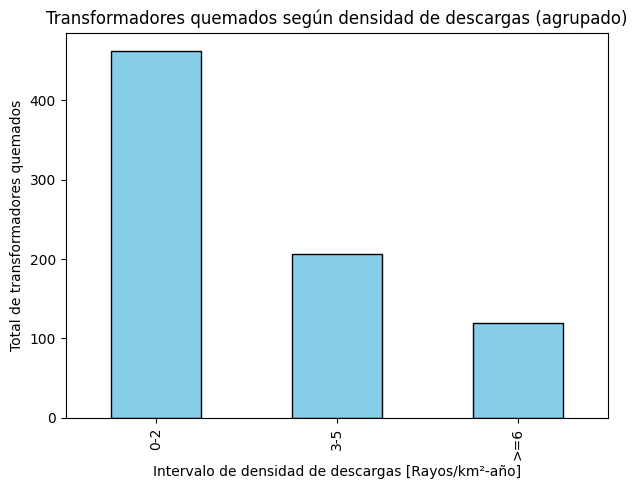

/tmp/ipython-input-2912077630.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  burning_descarga_grouped = df.groupby('DDT_interval')['Burning rate  [Failures/year]'].sum()


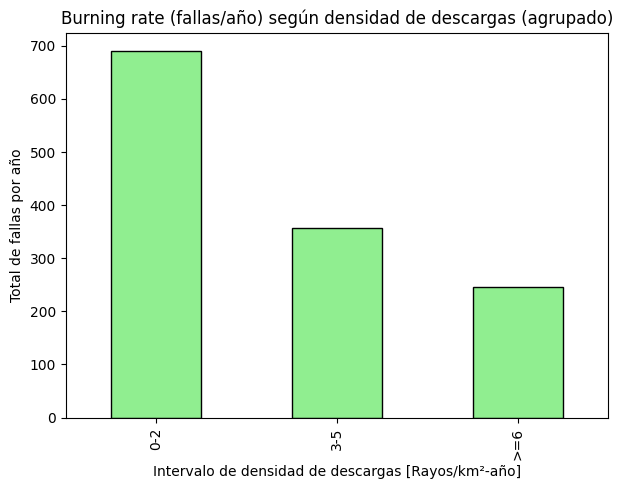

In [ ]:
# Average discgarges
# 1. Average discharge density agrupada
# ---------------------------
# Definir los intervalos (bins)
bins_descargas = [0, 2, 5, float('inf')]
labels_descargas = ['0-2', '3-5', '>=6']

# Crear nueva columna con el intervalo
df['DDT_interval'] = pd.cut(
    df['Average earth discharge density DDT [Rays/km^2-año]'],
    bins=bins_descargas,
    labels=labels_descargas,
    right=True
)

# Agrupar y calcular TOTAL de Burned transformers
descarga_grouped = df.groupby('DDT_interval')['Burned transformers 2019'].sum()

# Graficar
plt.figure(figsize=(7,5))
descarga_grouped.plot(kind='bar', color="skyblue", edgecolor="black")
plt.title("Transformadores quemados según densidad de descargas (agrupado)")
plt.xlabel("Intervalo de densidad de descargas [Rayos/km²-año]")
plt.ylabel("Total de transformadores quemados")
plt.show()


# 1. Burning rate vs Average discharge density (agrupado)
# ---------------------------
bins_descargas = [0, 2, 5, float('inf')]
labels_descargas = ['0-2', '3-5', '>=6']

df['DDT_interval'] = pd.cut(
    df['Average earth discharge density DDT [Rays/km^2-año]'],
    bins=bins_descargas,
    labels=labels_descargas,
    right=True
)

# Agrupar y calcular TOTAL de burning rate por intervalo
burning_descarga_grouped = df.groupby('DDT_interval')['Burning rate  [Failures/year]'].sum()

plt.figure(figsize=(7,5))
burning_descarga_grouped.plot(kind='bar', color="lightgreen", edgecolor="black")
plt.title("Burning rate (fallas/año) según densidad de descargas (agrupado)")
plt.xlabel("Intervalo de densidad de descargas [Rayos/km²-año]")
plt.ylabel("Total de fallas por año")
plt.show()

En el caso de la densidad de descargas atmosféricas podemos observar que la mayor tasa de fallas y transformadores quemados se encuentra en el grupo que tiene de 0-2 descargas por año. Es muy probable que esto se deba a que en zonas donde no ocurran tantas descargas eléctricas, no se tengan las protecciones adecuadas o necesarias para proteger a los transformadores, por tanto en caso de ocurrir una descarga atmosférica los transformadores van a fallar. Caso contrario a la zonas que tienen mas de 6 descargas por año, esto se puede deber a una mayor presencia de protecciones para sobretensiones transitorias como lo son los dps, lo cual mantiene protegidos a los equipos.

/tmp/ipython-input-313129629.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  burned_km_grouped = df.groupby('KM_interval')['Burned transformers 2019'].sum()


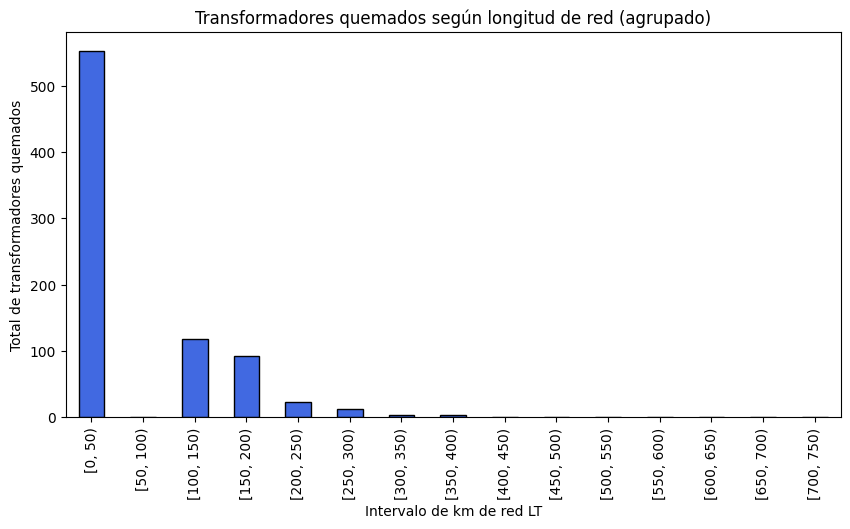

/tmp/ipython-input-313129629.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  burning_km_grouped = df.groupby('KM_interval')['Burning rate  [Failures/year]'].sum()


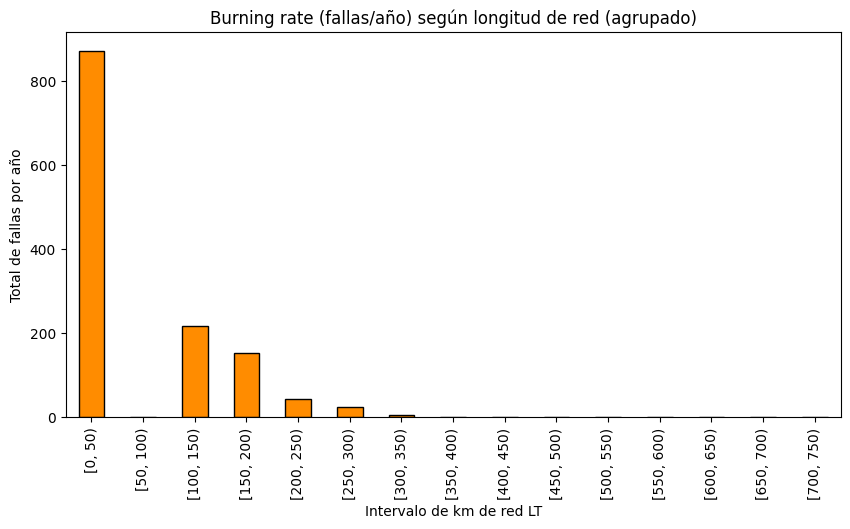

In [ ]:
# KM de lineas
# Definir intervalos para la longitud de red

# Convertir la columna 'km of network LT:' a numérica corrigiendo comas
df['km of network LT:'] = (
    df['km of network LT:']
    .astype(str)          # convertir todo a string
    .str.replace(',', '.') # cambiar coma por punto decimal
    .astype(float)         # convertir a número flotante
)
# (puedes ajustar el tamaño de los bins según tus datos, aquí hago de 0 a máx en pasos de 10 km)
bins_km = range(0, int(df['km of network LT:'].max())+50, 50)

# Crear nueva columna con intervalos de km
df['KM_interval'] = pd.cut(
    df['km of network LT:'],
    bins=bins_km,
    right=False
)

# ---------------------------
# 1. Total Burned transformers por intervalo de km
burned_km_grouped = df.groupby('KM_interval')['Burned transformers 2019'].sum()

plt.figure(figsize=(10,5))
burned_km_grouped.plot(kind='bar', color="royalblue", edgecolor="black")
plt.title("Transformadores quemados según longitud de red (agrupado)")
plt.xlabel("Intervalo de km de red LT")
plt.ylabel("Total de transformadores quemados")
plt.show()

# ---------------------------
# 2. Total Burning rate por intervalo de km
burning_km_grouped = df.groupby('KM_interval')['Burning rate  [Failures/year]'].sum()

plt.figure(figsize=(10,5))
burning_km_grouped.plot(kind='bar', color="darkorange", edgecolor="black")
plt.title("Burning rate (fallas/año) según longitud de red (agrupado)")
plt.xlabel("Intervalo de km de red LT")
plt.ylabel("Total de fallas por año")
plt.show()

En estas representaciones de "Burning rate" vs "km of network LT:" y "Burned transformers" vs "km of network LT:" se puede observar que la mayor concentración de fallas se encuentra en las líneas de menor longitud, (0-50 km), debido a que este intervalo concentra la mayor cantidad de redes o líneas, y la que contiene mayor cantidad de transformadores de distribución por lo tanto se tendrá un mayor número de fallas que en el resto de intervalos de distancias.

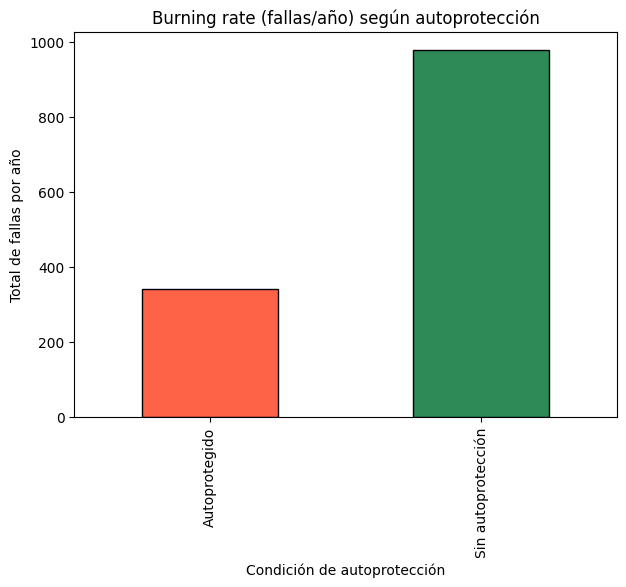

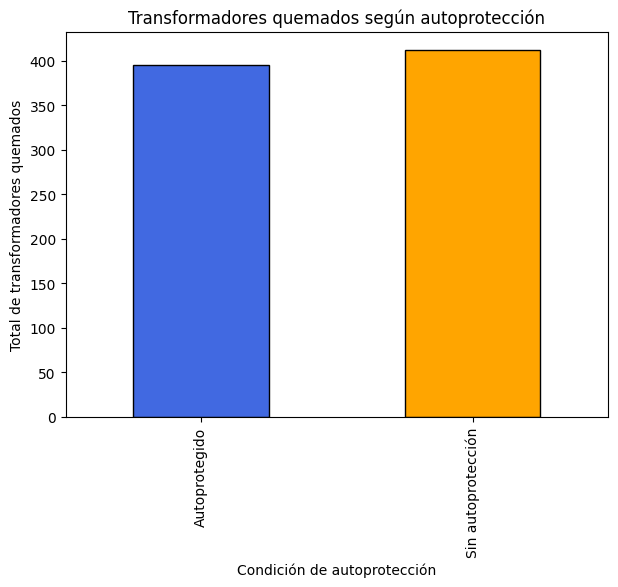

In [ ]:
# Autoprotegido

# 1. Burning rate vs Self-protection
burning_self = df.groupby('SELF-PROTECTION')['Burning rate  [Failures/year]'].sum()

plt.figure(figsize=(7,5))
burning_self.plot(kind='bar', color=['tomato','seagreen'], edgecolor="black")
plt.title("Burning rate (fallas/año) según autoprotección")
plt.xlabel("Condición de autoprotección")
plt.ylabel("Total de fallas por año")
plt.show()


# 2. Burned transformers vs Self-protection
burned_self = df.groupby('SELF-PROTECTION')['Burned transformers 2019'].sum()

plt.figure(figsize=(7,5))
burned_self.plot(kind='bar', color=['royalblue','orange'], edgecolor="black")
plt.title("Transformadores quemados según autoprotección")
plt.xlabel("Condición de autoprotección")
plt.ylabel("Total de transformadores quemados")
plt.show()

En la primer gráfica se observa la relación entre las fallas por año y la especificación de los transformadores (Autoprotegido o sin autoprotección). Se puede observar que los transformadores que no son autoprotegidos presentan un mayor número de fallas que los no autoprotegidos, por motivos de redundancia en la protección contra sobretensiones. Para el caso de la segunda gráfica de "Burned transformers" vs "SELF-PROTECTION" se tiene una cantidad muy similar de transformadores quemados en los autoprotegidos y en los no autoprotegidos, también se observa que los autoprotegidos tienen un numero similar d fallas que de quemaduras por lo tanto se puede concluir que la mayoria de transformadores autoprotegidos que fallan se queman. Mientras que la mayor cantidad de transformadores no autoprotegidos que fallan, no se queman, vuelven a entrar en operación.

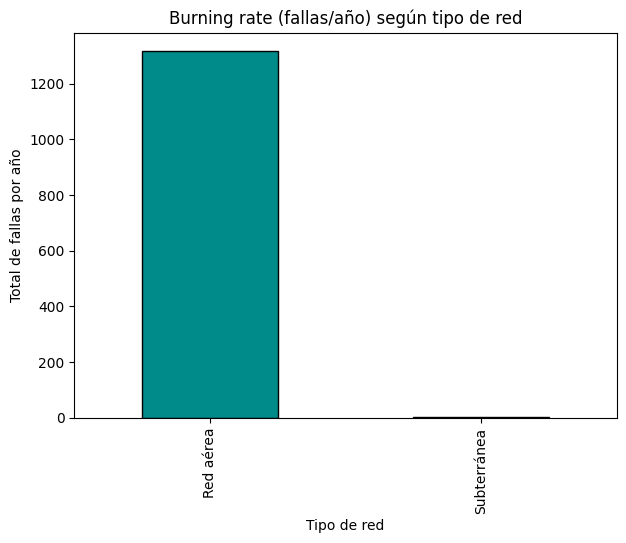

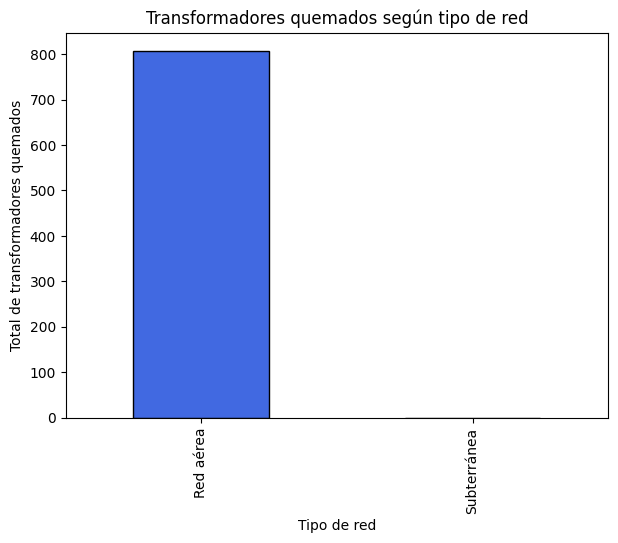

In [ ]:
# Air network
# Mapear valores de Air network
df['Air network'] = df['Air network'].map({0: 'Subterránea', 1: 'Red aérea'})

# ---------------------------
# 1. Burning rate vs Air network
burning_air = df.groupby('Air network')['Burning rate  [Failures/year]'].sum()

plt.figure(figsize=(7,5))
burning_air.plot(kind='bar', color=['darkcyan','salmon'], edgecolor="black")
plt.title("Burning rate (fallas/año) según tipo de red")
plt.xlabel("Tipo de red")
plt.ylabel("Total de fallas por año")
plt.show()


# 2. Burned transformers vs Air network
burned_air = df.groupby('Air network')['Burned transformers 2019'].sum()

plt.figure(figsize=(7,5))
burned_air.plot(kind='bar', color=['royalblue','orange'], edgecolor="black")
plt.title("Transformadores quemados según tipo de red")
plt.xlabel("Tipo de red")
plt.ylabel("Total de transformadores quemados")
plt.show()

En estas gráficas se registra el número de fallas y quemaduras de acuerdo a si la red es aérea o subterránea, en las cuales se evidencia que la mayor cantidad de fallas y quemaduras suceden en las redes aéreas.

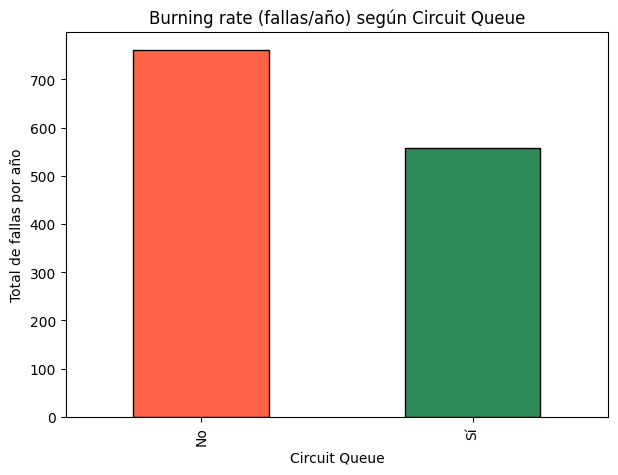

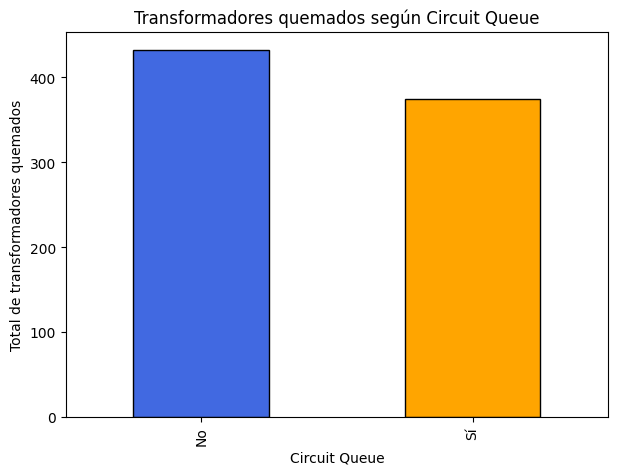

In [ ]:
# Circuit Quenue

# Mapear valores de Circuit Queue
df['Circuit Queue'] = df['Circuit Queue'].map({0: 'No', 1: 'Sí'})

# ---------------------------
# 1. Burning rate vs Circuit Queue
burning_circuit = df.groupby('Circuit Queue')['Burning rate  [Failures/year]'].sum()

plt.figure(figsize=(7,5))
burning_circuit.plot(kind='bar', color=['tomato','seagreen'], edgecolor="black")
plt.title("Burning rate (fallas/año) según Circuit Queue")
plt.xlabel("Circuit Queue")
plt.ylabel("Total de fallas por año")
plt.show()

# ---------------------------
# 2. Burned transformers vs Circuit Queue
burned_circuit = df.groupby('Circuit Queue')['Burned transformers 2019'].sum()

plt.figure(figsize=(7,5))
burned_circuit.plot(kind='bar', color=['royalblue','orange'], edgecolor="black")
plt.title("Transformadores quemados según Circuit Queue")
plt.xlabel("Circuit Queue")
plt.ylabel("Total de transformadores quemados")
plt.show()

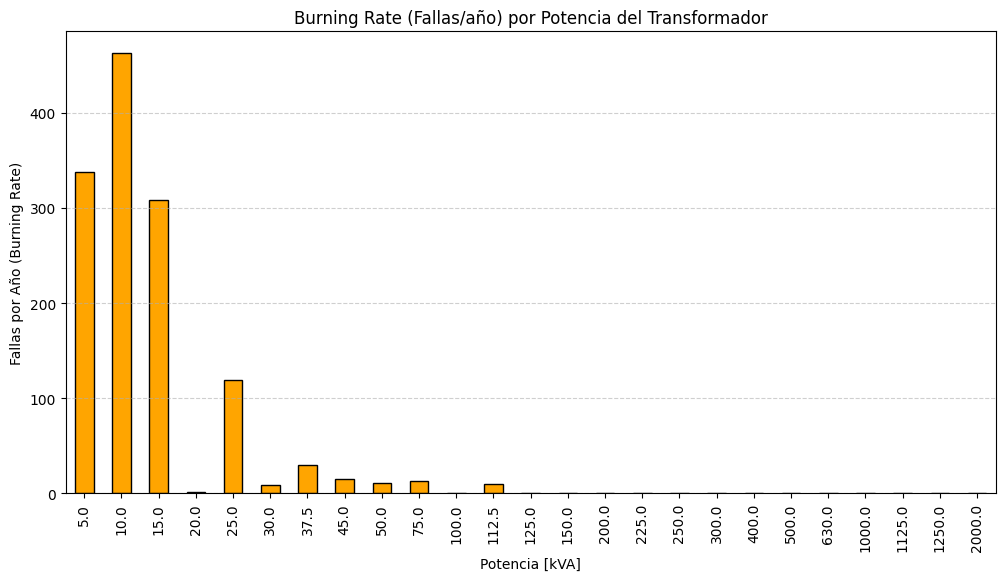

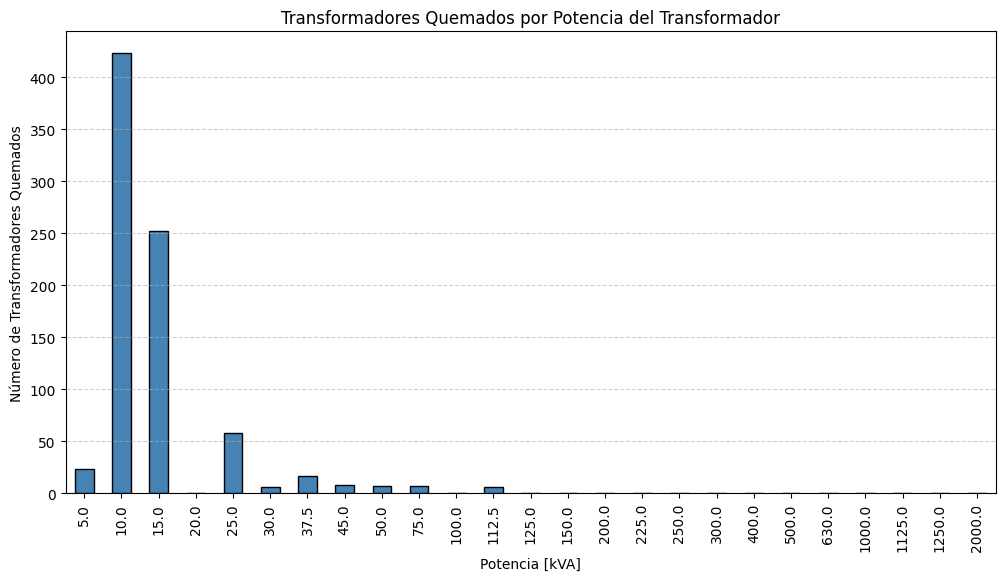

In [ ]:
# Potencia
# Burning rate  [Failures/year]    km of network LT:
# Agrupar por cada valor de potencia
failures_by_power = df.groupby("POWER")["Burning rate  [Failures/year]"].sum()
burned_by_power = df.groupby("POWER")["Burned transformers 2019"].sum()

# Gráfico 1: Burning Rate vs Power
plt.figure(figsize=(12,6))
failures_by_power.plot(kind="bar", color="orange", edgecolor="black")
plt.title("Burning Rate (Fallas/año) por Potencia del Transformador")
plt.xlabel("Potencia [kVA]")
plt.ylabel("Fallas por Año (Burning Rate)")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Gráfico 2: Burned Transformers vs Power
plt.figure(figsize=(12,6))
burned_by_power.plot(kind="bar", color="steelblue", edgecolor="black")
plt.title("Transformadores Quemados por Potencia del Transformador")
plt.xlabel("Potencia [kVA]")
plt.ylabel("Número de Transformadores Quemados")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()



Estas gráficas agrupan el número de fallas o quemaduras por potencia de transformador. Se tienen la mayor cantidad de fallas en los transformadors con potencias bajas(5-112.5 kVA) en donde el nivel de potencia que concentra ka mayor cantidad de fallas y quemaduras es el de 10 kVA.

Análisis de correlación.

Matriz de correlación:
                                                    LOCATION     POWER  \
LOCATION                                            1.000000  0.542181   
POWER                                               0.542181  1.000000   
SELF-PROTECTION                                    -0.110348 -0.125923   
Average earth discharge density DDT [Rays/km^2-...  0.171844  0.106205   
Maximum ground discharge density DDT [Rays/km^2...  0.069352  0.028136   
Burning rate  [Failures/year]                      -0.174911 -0.170408   
Criticality according to previous study for cer... -0.233925 -0.131138   
Removable connectors                                0.471632  0.192999   
Number of users                                     0.583083  0.530158   
Electric power not supplied EENS [kWh]              0.381879  0.940487   
Air network                                        -0.073925 -0.228780   
Circuit Queue                                      -0.022126 -0.015189   
Burned transfor

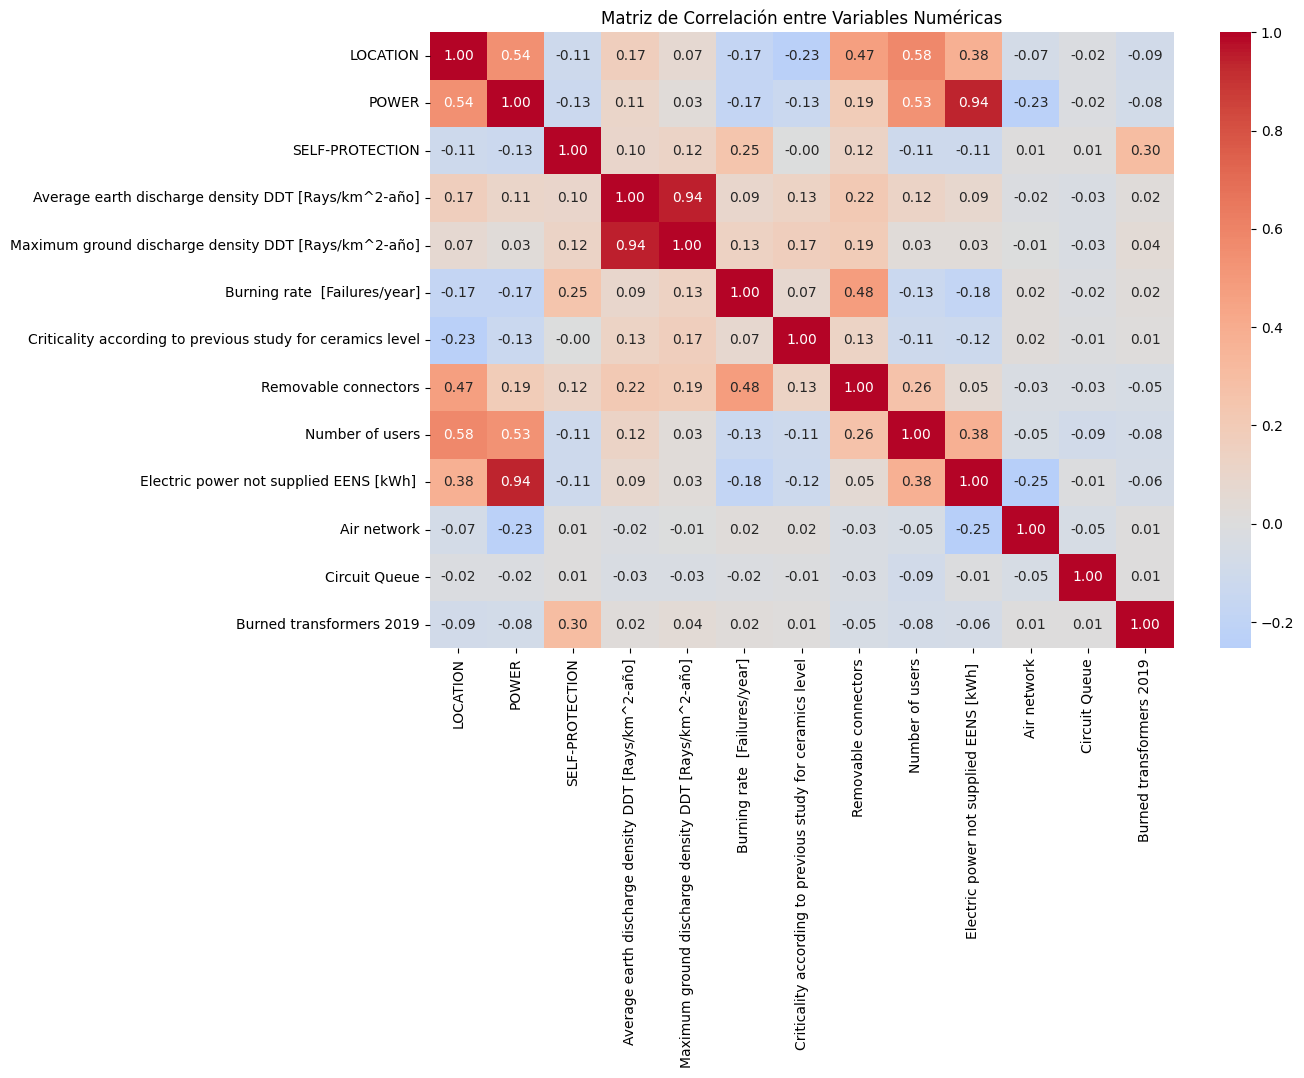

In [ ]:
# Seleccionar solo las columnas numéricas originales
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
corr_matrix = numeric_df.corr()

# Mostrar la matriz como tabla
print("Matriz de correlación:")
print(corr_matrix)

# Visualizar con un mapa de calor (heatmap)
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()

ANÁLISIS DE LA MATRIZ DE CORRELACIÓN

La matriz de correlación muestra la relación lineal entre las variables numéricas.
Los valores cercanos a +1 indican correlación positiva fuerte, los cercanos a -1 indican
correlación negativa fuerte, y los cercanos a 0 indican relación débil o nula.

RELACIONES MÁS RELEVANTES
1. POWER – Electric power not supplied EENS [kWh]
   Correlación: 0.94 (muy alta, positiva)
   A mayor potencia del transformador (POWER), mayor es la energía no suministrada en caso de falla (EENS).
   Esto es lógico, ya que transformadores de mayor capacidad afectan a más usuarios.

2. Average earth discharge density DDT – Maximum ground discharge density DDT
   Correlación: 0.94 (muy alta, positiva)
   Ambas métricas miden la densidad de descargas atmosféricas, por lo que su alta correlación es esperable.
   Puede evaluarse si es redundante mantener ambas variables.

3. LOCATION – Number of users
   Correlación: 0.58 (moderada, positiva)
   Algunas zonas agrupan mayor cantidad de usuarios, lo que ayuda a identificar áreas críticas.

4. LOCATION – POWER (0.54)
   Localidades con mayor número de usuarios suelen tener transformadores de mayor potencia.

5. Removable connectors – Burning rate (0.48)
   Relación moderada: la cantidad de conectores removibles podría estar asociada con mayor tasa de fallas.
   Puede ser un indicador útil para mantenimiento preventivo.

RELACIONES DÉBILES O NEGATIVAS
- LOCATION – km of network LT (-0.24)
  Áreas con más nodos no necesariamente tienen más kilómetros de red, lo que indica que en zonas densas
  hay más transformadores en menos extensión de red.

- LOCATION – Criticality for ceramics level (-0.23)
  La localidad no es determinante para el nivel de criticidad en cerámicas.

- La mayoría de variables respecto a "Burned transformers 2019" presentan correlaciones bajas (< 0.1),
  lo que sugiere que la quema de transformadores depende de múltiples factores combinados
  y no de una sola variable.

CONCLUSIONES GENERALES
- Existen dos grupos de variables altamente correlacionadas:
     Grupo 1: POWER y EENS (potencia ↔ energía no suministrada)
     Grupo 2: Average y Maximum DDT (densidad de descargas)
- Variables como Burning rate, Removable connectors y LOCATION tienen correlaciones moderadas con otras,
  lo que indica que podrían servir como factores de riesgo indirectos.
- Para análisis predictivo, POWER y EENS podrían causar multicolinealidad, por lo que convendría usar solo
  una de ellas en modelos de regresión